In [1]:
import tensorflow as tf

from keras.applications.vgg16 import VGG16
from keras import models
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.utils import to_categorical
from keras.datasets import fashion_mnist

from keras.utils import img_to_array, array_to_img

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 

In [2]:
conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(48, 48, 3))
conv_base.trainable = True
set_trainable = False


for layer in conv_base.layers:
    if layer.name in ["block5_conv1", "block5_conv2", "block5_conv3"]:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

model = models.Sequential([
   conv_base,
   layers.Flatten(),
   layers.Dense(256, activation="sigmoid"),
   layers.Dense(10, activation="softmax"),
])

model.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=2e-5),
    metrics=["acc"]
)

58889256/58889256 [==============================] - 1s 0us/step


In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14,848,586
Trainable params: 7,213,322
Non-trainable params: 7,635,264
_________________________________________________________________


In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
x_train = np.dstack([x_train] * 3)
x_train = x_train.reshape((-1, 28, 28, 3))
x_train = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_train])
x_train = x_train.astype("float32") / 255

x_test = np.dstack([x_test]*3)
x_test = x_test.reshape((-1, 28, 28, 3))
x_test = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_test])
x_test = x_test.astype("float32") / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=50,
    batch_size=100,
    validation_data=(x_val, y_val)
)

Epoch 1/50
500/500 [==============================] - 38s 55ms/step - loss: 0.1708 - acc: 0.7591 - val_loss: 0.1142 - val_acc: 0.8262
Epoch 2/50
500/500 [==============================] - 29s 58ms/step - loss: 0.0999 - acc: 0.8414 - val_loss: 0.0891 - val_acc: 0.8507
Epoch 3/50
500/500 [==============================] - 25s 50ms/step - loss: 0.0827 - acc: 0.8596 - val_loss: 0.0795 - val_acc: 0.8572
Epoch 4/50
500/500 [==============================] - 27s 54ms/step - loss: 0.0728 - acc: 0.8719 - val_loss: 0.0716 - val_acc: 0.8673
Epoch 5/50
500/500 [==============================] - 28s 55ms/step - loss: 0.0667 - acc: 0.8799 - val_loss: 0.0659 - val_acc: 0.8757
Epoch 6/50
500/500 [==============================] - 25s 51ms/step - loss: 0.0620 - acc: 0.8859 - val_loss: 0.0614 - val_acc: 0.8833
Epoch 7/50
500/500 [==============================] - 27s 55ms/step - loss: 0.0585 - acc: 0.8912 - val_loss: 0.0589 - val_acc: 0.8857
Epoch 8/50
500/500 [==============================] - 26s 51ms

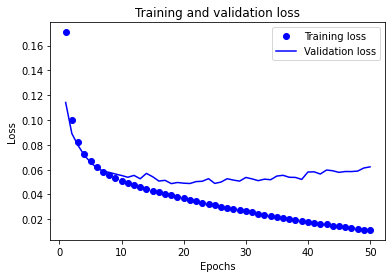

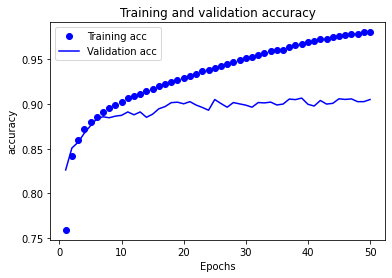

In [10]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_acc']
plt.plot(epochs, history_dict['acc'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_acc'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

In [11]:
results = model.evaluate(x_test, y_test)
print(results)

313/313 [==============================] - 6s 15ms/step - loss: 0.0676 - acc: 0.8990
[0.06763375550508499, 0.8989999890327454]
